# 그래프 그리기

---
## 1. 데이터 시각화가 필요한 이유
### 앤스콤 4분할 그래프 살펴보기
#### 앤스콤 데이터 집합 불러온 후 그래프 그리기

In [2]:
# 데이터 불러오기
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

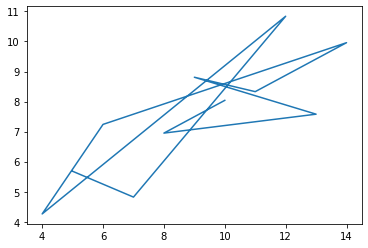

In [3]:
# 그래프 그리기
import matplotlib.pyplot as plt
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])

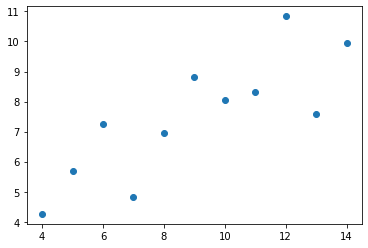

In [4]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o') # 'o': 점으로 그래프

In [5]:
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

#### 앤스콤 데이터 집합 모두 사용해 그래프 만들기

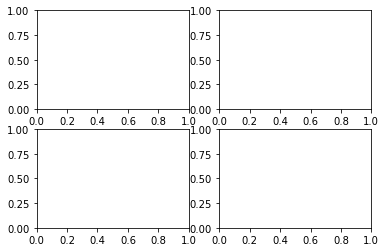

In [6]:
# 4분할 그래프 기본 틀 만들기
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

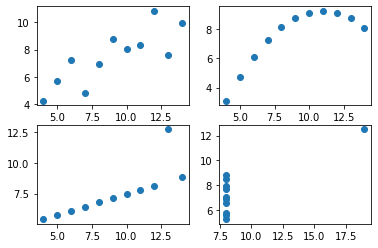

In [7]:
# 데이터 넣기
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

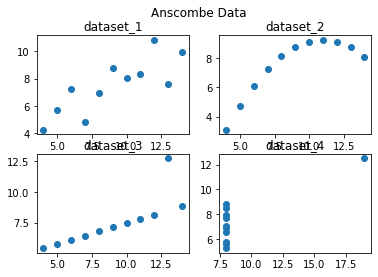

In [8]:
# 제목 추가하기
fig.suptitle("Anscombe Data")

axes1.set_title("dataset_1") 
axes2.set_title("dataset_2")
axes3.set_title("dataset_3") 
axes4.set_title("dataset_4")

fig

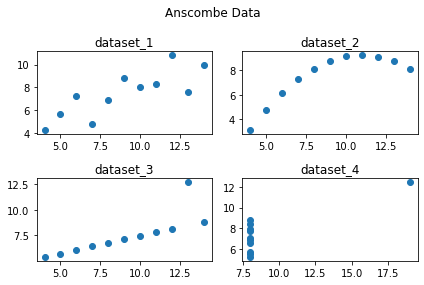

In [9]:
# 그래프의 레이아웃 조절
fig.tight_layout()

fig

---
## 2. matplotlib 라이브러리 자유자재로 사용하기
==================================================
### 2.1 기초 그래프 그리기

In [10]:
# 데이터
tips = sns.load_dataset("tips")

#### 히스토그램

Text(0, 0.5, 'Total Bill')

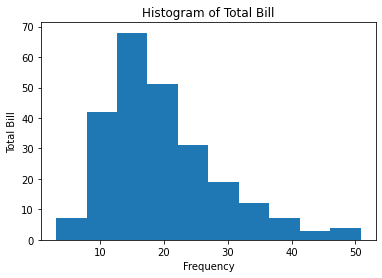

In [11]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10) # bins=: x축 간격
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency') 
axes1.set_ylabel('Total Bill')

#### 산점도 그래프

Text(0, 0.5, 'Tip')

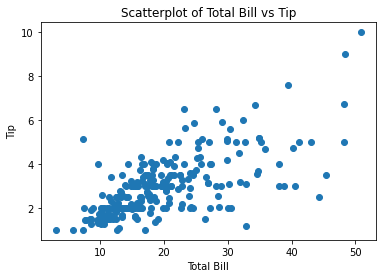

In [12]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

#### 박스 그래프

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

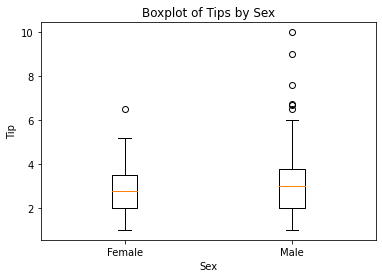

In [13]:
# 연속형변수와 범주형변수를 함께 사용

boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], 
     tips[tips['sex'] == 'Male']['tip']], 
    labels=['Female', 'Male'])


axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')

==================================================
### 2.2 다변량 그래프 그리기

In [14]:
# Female이면 0, Male이면 1 반환하는 함수

def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

In [15]:
# 컬럼 추가
# .apply: 모든 셀에 함수 적용
tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

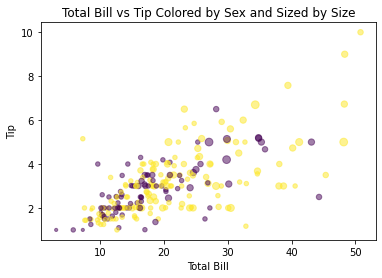

In [16]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 10, # 점의 크기
    c=tips['sex_color'], # 점의 색상
    alpha=0.5)           # 투명도

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

---
## 3. seaborn 라이브러리 자유자재로 사용하기
==================================================
### 3.1 단변량 그래프 그리기

In [17]:
# 데이터 불러오기

import seaborn as sns

tips = sns.load_dataset("tips")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

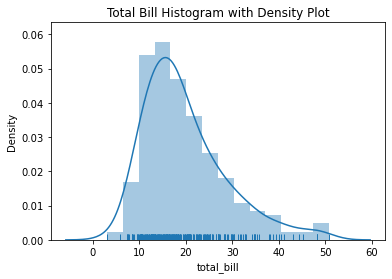

In [19]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
# 밀집도 그래프 제외하기: kde=False
# 히스토그램 제외하기: hist=False
# 양탄자 그래프 추가: rug=True
ax.set_title('Total Bill Histogram with Density Plot')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

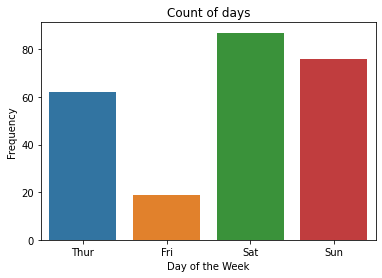

In [20]:
# 카운트(Count) 그래프
# x축 범주형

ax = plt.subplots() 
ax = sns.countplot('day', data=tips) 
ax.set_title('Count of days') 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Frequency') 

==================================================
### 3.2 다양한 종류의 이변량 그래프

Text(0, 0.5, 'Tip')

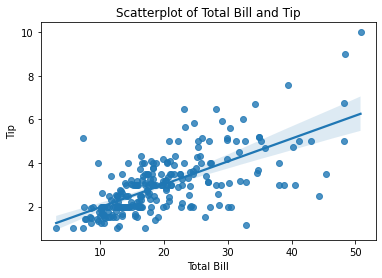

In [21]:
# 산점도와 회귀선
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips)
# 회귀선 제거하기: fit_reg=False
 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

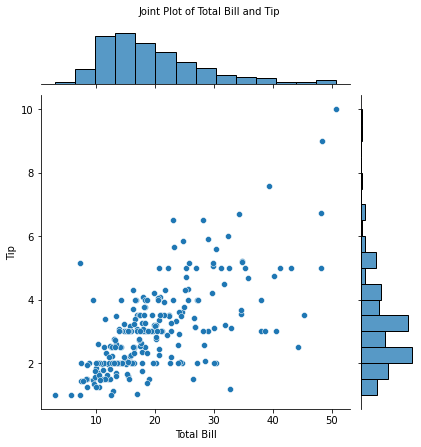

In [23]:
# 산점도와 히스토그램
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
# 육각형 그래프 그리기(산점도 점이 많이 겹칠때): kind="hex"

joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

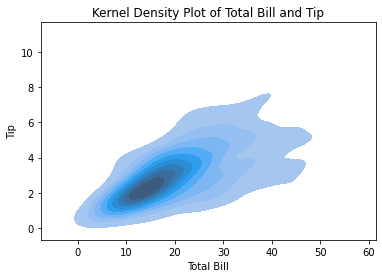

In [26]:
# 이차원 밀집도
ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

Text(0, 0.5, 'Average total bill')

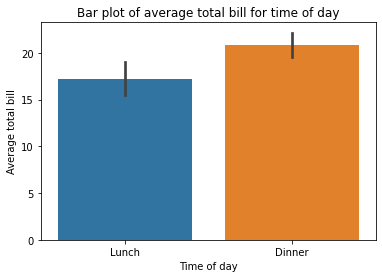

In [27]:
# 바 그래프
ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total Bill')

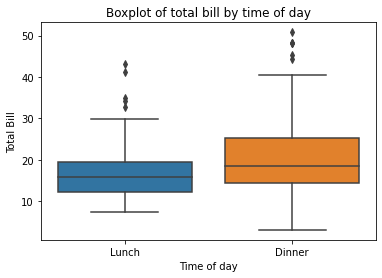

In [28]:
# 박스 그래프
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill') 

Text(0, 0.5, 'Total Bill')

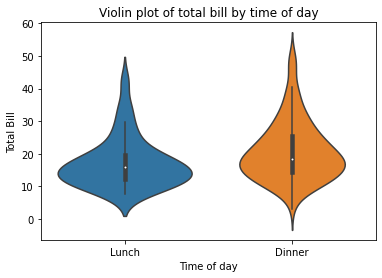

In [29]:
# 바이올린 그래프
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

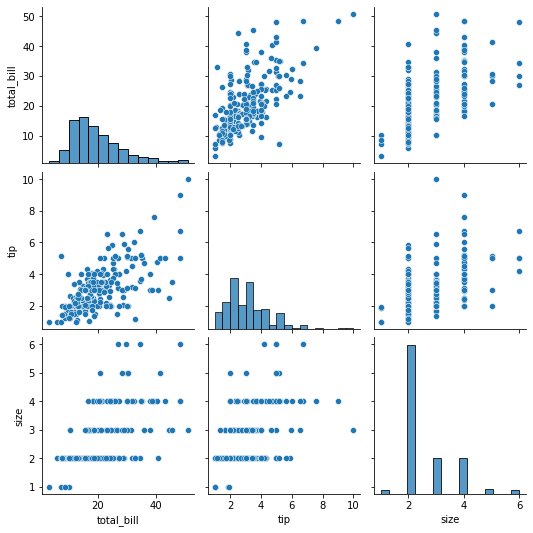

In [30]:
# 관계 그래프
fig = sns.pairplot(tips)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

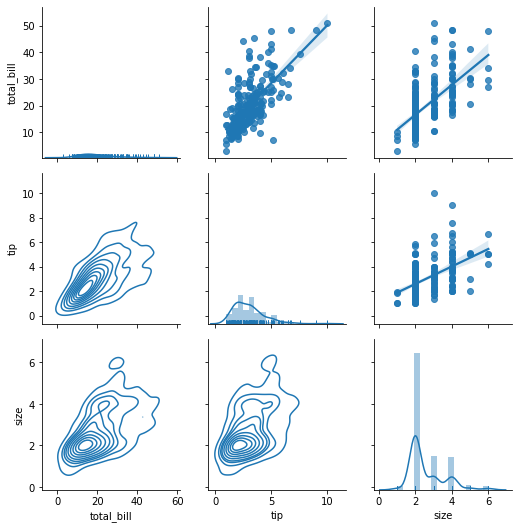

In [31]:
# 관계 그래프 지정하기
# 기존:대각선을 기준으로 중복

pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) # 대각선 위쪽
pair_grid = pair_grid.map_lower(sns.kdeplot) # 대각선 아래쪽
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) # 대각선 상
plt.show()

==================================================
### 3.3 다변량 그래프 그리기

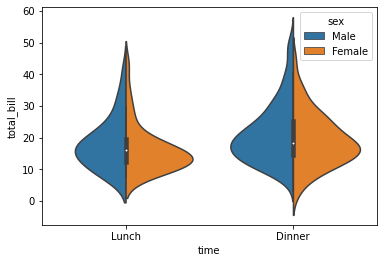

In [33]:
# 바이올린 그래프
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
# hue='색상에 사용할 열' 

plt.show()

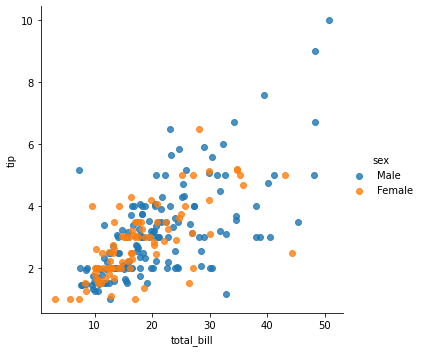

In [34]:
# 산점도
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
# hue='색상에 사용할 열' 

plt.show()

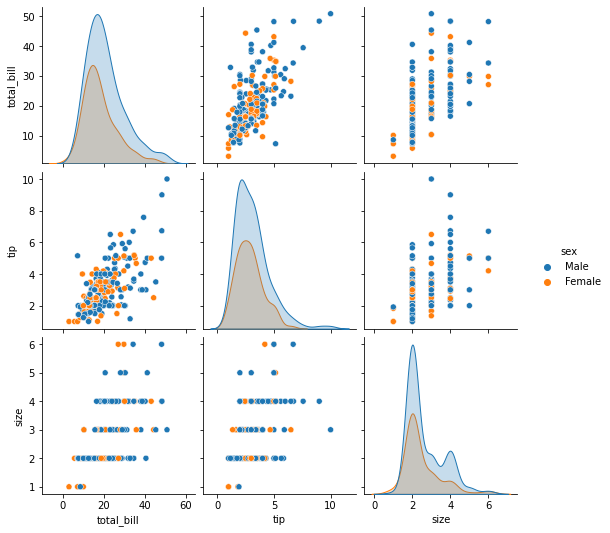

In [35]:
# 관계 그래프
fig = sns.pairplot(tips, hue='sex')

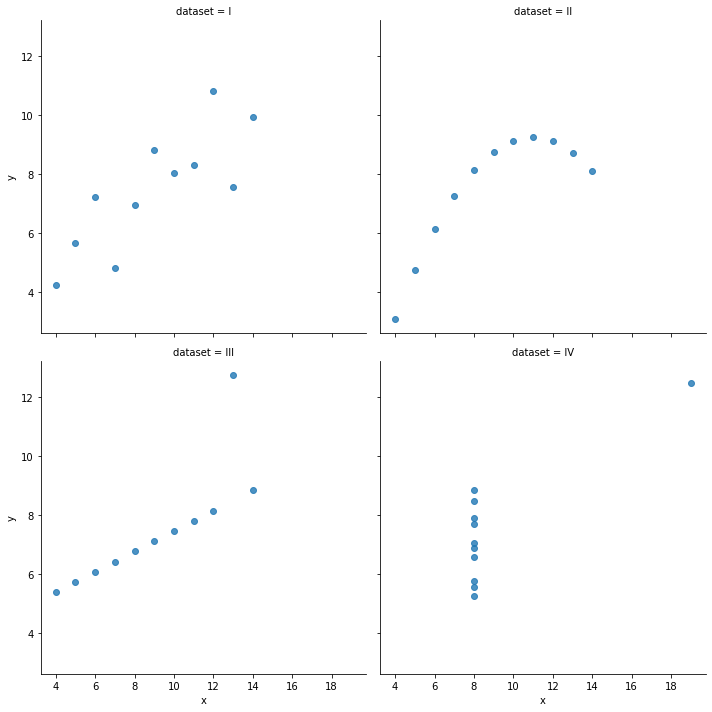

In [57]:
# 4개의 데이터 그룹에 대한 그래프

# 한그래프에 모든 그룹
# anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

# 4그래프 따로 그리기: col='dataset'(구분 열), col_wrap=2(열의 최대값) 파라미터 추가
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

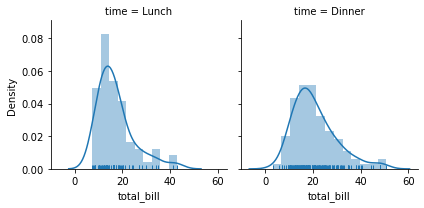

In [58]:
# FacetGrid 클래스로 그룹별 그래프 그리기
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True) 

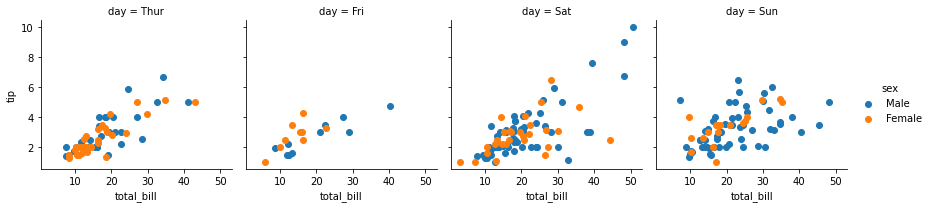

In [59]:
# FacetGrid 클래스로 다변량 그래프 그리기
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend() 

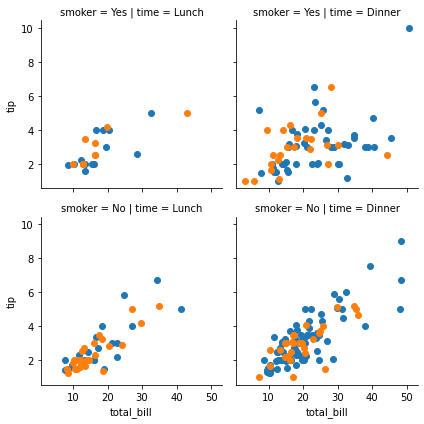

In [60]:
# FacetGrid 클래스 여러 범주 그룹화 그래프 그리기
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip')

---
## 4. 데이터프레임과 시리즈로 그래프 그리기

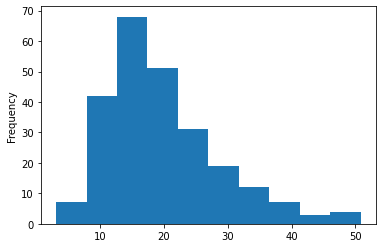

In [61]:
# 히스토그램
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

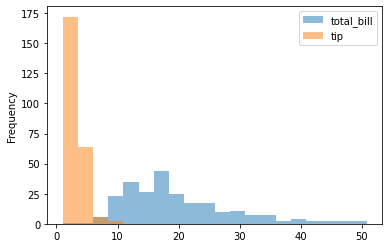

In [67]:
fig, ax = plt.subplots() 

ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax) 

In [ ]:
page114

In [ ]:
==================================================

244